In [1]:
!pip install -q  gymnasium

In [ ]:
import gymnasium as gym

# Create the environment
env = gym.make("FrozenLake-v1", is_slippery=True)  # stochastic version


In [ ]:
state, info = env.reset()
print("Initial state:", state)


Initial state: 0


In [ ]:
# Take one step: try moving **right** (action = 2)
next_state, reward, terminated, truncated, info = env.step(2)

print("Next state:", next_state)
print("Reward:", reward)
print("Terminated:", terminated)
print("Truncated:", truncated)


Next state: 1
Reward: 0.0
Terminated: False
Truncated: False


In [ ]:
next_state, reward, terminated, truncated, info = env.step(1)

print("Next state:", next_state)
print("Reward:", reward)
print("Terminated:", terminated)
print("Truncated:", truncated)


Next state: 0
Reward: 0.0
Terminated: False
Truncated: False


In [ ]:
import numpy as np

# Get number of states (16) and actions (4) from environment
state_space_size = env.observation_space.n
action_space_size = env.action_space.n

# Initialize Q-table with zeros
Q = np.zeros((state_space_size, action_space_size))

print(Q)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


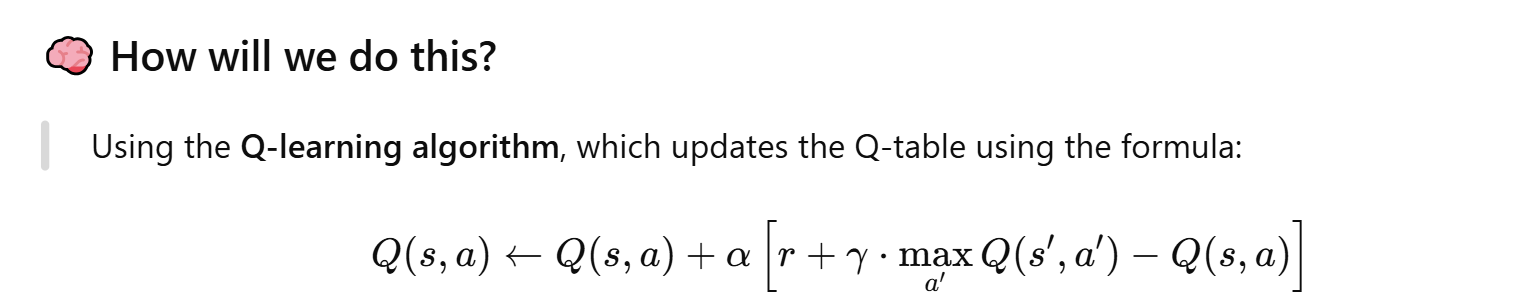

In [ ]:
# Q-Learning parameters

alpha = 0.1        # 🧠 Learning rate:
# How fast the agent updates its beliefs.
# Smaller alpha → slower but stable learning
# Larger alpha → faster, but can be unstable

gamma = 0.99       # ⏳ Discount factor:
# How much the agent values future rewards.
# gamma = 1.0 → agent cares a lot about long-term reward
# gamma = 0.0 → agent only cares about immediate reward

epsilon = 1.0      # 🎲 Exploration rate:
# Probability of taking a random action (exploring)
# epsilon = 1.0 → pure exploration
# epsilon = 0.0 → pure exploitation (use Q-table only)

epsilon_decay = 0.001   # How much to reduce epsilon per episode
min_epsilon = 0.01      # Minimum value for epsilon


In [ ]:
# 4. Training loop
import random
num_episodes = 2000
max_steps_per_episode = 100
for episode in range(num_episodes):
    state, _ = env.reset()
    done = False

    for step in range(max_steps_per_episode):

        # Step 1: Choose action using epsilon-greedy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()     # explore
        else:
            action = np.argmax(Q[state])           # exploit

        # Step 2: Take action
        new_state, reward, done, truncated, _ = env.step(action)

        # Step 3: Update Q-table using Q-learning formula
        Q[state][action] = Q[state][action] + alpha * (
            reward + gamma * np.max(Q[new_state]) - Q[state][action]
        )

        # Step 4: Move to new state
        state = new_state

        # Step 5: End if done
        if done or truncated:
            break

    # Step 6: Decay epsilon after each episode
    epsilon = max(min_epsilon, epsilon - epsilon_decay)


In [ ]:
Q

array([[0.5317842 , 0.44060709, 0.43059686, 0.41310345],
       [0.14724311, 0.12806791, 0.07261409, 0.44101615],
       [0.32236843, 0.06179659, 0.09141818, 0.07452543],
       [0.01341384, 0.06072186, 0.01110293, 0.0127447 ],
       [0.55035082, 0.27410661, 0.24521723, 0.33059235],
       [0.        , 0.        , 0.        , 0.        ],
       [0.36549109, 0.04682479, 0.05926864, 0.02125185],
       [0.        , 0.        , 0.        , 0.        ],
       [0.25363883, 0.27800826, 0.29818396, 0.57695764],
       [0.3149016 , 0.59886564, 0.38545135, 0.28125131],
       [0.61497912, 0.29656291, 0.37257528, 0.1200594 ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.18366837, 0.3294203 , 0.73552197, 0.27493212],
       [0.43423592, 0.57132945, 0.8180656 , 0.57381737],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
state, _ = env.reset()
done = False

print("Agent's Journey:\n")

for step in range(100):
    # Always choose best action (no more exploration)
    action = np.argmax(Q[state])

    new_state, reward, done, truncated, _ = env.step(action)

    print(f"Step {step+1}: State {state} → Action {action} → New State {new_state} | Reward: {reward}")

    state = new_state

    if done or truncated:
        print("\nEpisode finished.")
        if reward == 1:
            print("🏆 Goal reached!")
        else:
            print("💀 Fell into a hole!")
        break


Agent's Journey:

Step 1: State 0 → Action 0 → New State 0 | Reward: 0.0
Step 2: State 0 → Action 0 → New State 4 | Reward: 0.0
Step 3: State 4 → Action 0 → New State 4 | Reward: 0.0
Step 4: State 4 → Action 0 → New State 0 | Reward: 0.0
Step 5: State 0 → Action 0 → New State 0 | Reward: 0.0
Step 6: State 0 → Action 0 → New State 0 | Reward: 0.0
Step 7: State 0 → Action 0 → New State 4 | Reward: 0.0
Step 8: State 4 → Action 0 → New State 4 | Reward: 0.0
Step 9: State 4 → Action 0 → New State 0 | Reward: 0.0
Step 10: State 0 → Action 0 → New State 0 | Reward: 0.0
Step 11: State 0 → Action 0 → New State 0 | Reward: 0.0
Step 12: State 0 → Action 0 → New State 0 | Reward: 0.0
Step 13: State 0 → Action 0 → New State 4 | Reward: 0.0
Step 14: State 4 → Action 0 → New State 0 | Reward: 0.0
Step 15: State 0 → Action 0 → New State 0 | Reward: 0.0
Step 16: State 0 → Action 0 → New State 4 | Reward: 0.0
Step 17: State 4 → Action 0 → New State 4 | Reward: 0.0
Step 18: State 4 → Action 0 → New State

In [ ]:
successes = 0

for _ in range(100):
    state, _ = env.reset()
    done = False

    for _ in range(100):
        action = np.argmax(Q[state])
        state, reward, done, truncated, _ = env.step(action)

        if done or truncated:
            if reward == 1:
                successes += 1
            break

print(f"Agent reached the goal {successes} times out of 100")


Agent reached the goal 62 times out of 100
